# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: Permutation testing
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

/Users/wrober212/anaconda3/anaconda3/envs/eda_python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/wrober212/anaconda3/anaconda3/envs/eda_python_3_7/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


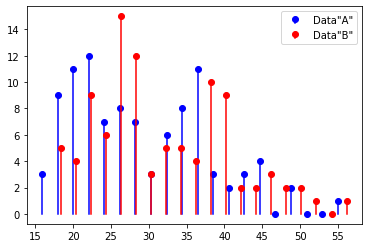

In [2]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [11]:
## mix trials together

# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))
conds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [4]:
## generate one null hypothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2


# these two means should be different.
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])


[28.834227162092454, 31.878304241151703]
[30.043917941028624, 30.668613462215532]


In [9]:
np.random.permutation(N*2)

array([129,  86, 141, 183, 110,  59,  49, 171,  87,  19, 133,  55, 158,
       185,   0, 114,  29,  48, 197,  27, 146, 194,  78, 160, 181, 193,
       120, 153,   1,  74, 118,  93,  20, 105,   5, 100,  98, 198, 117,
        62,  46, 174,  56,  30, 156, 124,  65,  42, 116,  51, 131,  91,
        69, 134, 179, 119,   7, 143, 145,  38,  24, 136, 103,  66, 123,
       149,   3,  50,  41,  45,  26, 166, 169, 168,  77, 188,  10, 101,
        60,  80,  61,  17,  73, 192,  63,  16, 132,   6, 104,  71,  58,
         9, 111,  18, 199, 191,  85, 189,  84, 102, 140, 182, 147,  70,
        25,  64, 172,  67, 177, 161,  53, 112,  54, 115,  28, 165,  36,
       196, 139,  34, 175, 190,  90, 142,   4,  37,  68,  11,  33,  88,
       184,  44, 163,  40, 176, 187, 148, 108, 137,  99,  96,  32,  35,
        31,  82,  22, 144, 127,  97,  81, 138, 162,  72,   8,  83, 135,
         2, 195, 173,  75, 178,  13, 154, 107,  52,  14,  89,  94, 159,
        57,  47, 122, 157,  76, 109, 186, 113,  95,  21, 167,  9

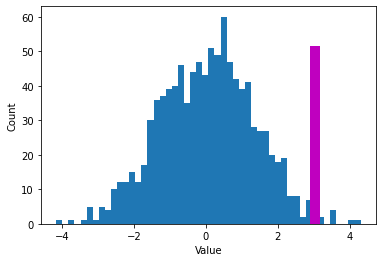

In [5]:
## and now a distribution of null hypothesis values

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])


# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0, 50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [6]:
## two methods of evaluating statistical significance

# Z-value
zVal = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

0.011422146776257747 0.008
